# Statistical data analyst

Megaline is telecom operator, they ask us to study customer behavior, time they spend in calls, ho many messages they used and how much they are using the Internet per month. Then analyse it with the plans they have in order to know wich plan give the companie the most revenue.

# 1. Open the data

In [1]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the libraries and exploring the data
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import seaborn as sns
import math
from functools import reduce
from scipy import stats

In [3]:
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
#converting the data to necessary types
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_calls['duration'] = [math.ceil(number) for number in data_calls['duration']]
data_calls['duration'] = data_calls['duration'].astype(int)
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [6]:
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
data_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [7]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
data_messages = pd.read_csv('/datasets/megaline_messages.csv')
data_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
data_plans = pd.read_csv('/datasets/megaline_plans.csv')
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
data_users = pd.read_csv('/datasets/megaline_users.csv')
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [14]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In this part I opened the data and used info() method to see what kind of data I have. I changed the type of data for some columns, but when I will progress on my project I may changed also other columns.

# 2. Preparing the data 

In [15]:
#checking all the data is in one year before adding a column for month.
print('min', data_calls.min())
print('max', data_calls.max())

min id                      1000_145
user_id                     1000
call_date    2018-01-15 00:00:00
duration                       0
dtype: object
max id                       1499_99
user_id                     1499
call_date    2018-12-31 00:00:00
duration                      38
dtype: object


In [16]:
#add a column for month
data_calls['month']= pd.DatetimeIndex(data_calls['call_date']).month
data_calls.head(3)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12


In [17]:
#to calculate the minutes spent by user in a specific month
monthly_calls = data_calls.groupby(['user_id','month']).month.count()

display(monthly_calls.head(3))

user_id  month
1000     12       16
1001     8        27
         9        49
Name: month, dtype: int64

In [18]:
#minutes per month per user
calls_ids_length = data_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc='sum')
calls_ids_length.head(3)

duration
user_id month          
1000    12          124
1001    8           182
        9           315

In [19]:
#checking all the data is in one year
print('min', data_messages.min())
print('max', data_messages.max())

min id                         1000_125
user_id                        1000
message_date    2018-01-15 00:00:00
dtype: object
max id                          1497_68
user_id                        1497
message_date    2018-12-31 00:00:00
dtype: object


In [20]:
#add a column for month
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages.head(3)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12


In [21]:
monthly_messages = data_messages.groupby(['user_id','month']).message_date.count()
monthly_messages.head(3)

user_id  month
1000     12       11
1001     8        30
         9        44
Name: message_date, dtype: int64

In [22]:
#checking all the data is in one year
print('min', data_internet.min())
print('max', data_internet.max())

min id                          1000_13
user_id                        1000
session_date    2018-01-15 00:00:00
mb_used                           0
dtype: object
max id                          1499_99
user_id                        1499
session_date    2018-12-31 00:00:00
mb_used                     1693.47
dtype: object


In [23]:
mb_to_gb = 0.001024
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_internet['month'] = data_internet['session_date'].dt.month
internet_ids_mb = data_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
internet_ids_mb['gb_used'] = internet_ids_mb['mb_used'] * mb_to_gb
internet_ids_mb['gb_used'] = [math.ceil(number) for number in internet_ids_mb['gb_used']]
internet_ids_mb['gb_used'] = internet_ids_mb['gb_used'].astype(int)
internet_ids_mb.head()

mb_used  gb_used
user_id month                   
1000    12      1901.47        2
1001    8       6919.15        8
        9      13314.82       14
        10     22330.49       23
        11     18504.30       19

Now that I check and add column when needed in each Dataframe separetly I will join all the data frames to have all the Data in one clear table.

In [24]:
data_frames = [calls_ids_length, monthly_messages, internet_ids_mb]
user_usages = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                                how='outer'),data_frames)
user_usages.rename(columns = {'message_date': 'messages'}, inplace = True)
data_frames_1 = [user_usages,data_users]
user_usages = reduce(lambda  left,right:pd.merge(left,right,on=['user_id'],
                                                how='outer'), data_frames_1)
user_usages = user_usages.fillna(value = 0) #0 mean user didn't use this value this month
user_usages 

,user_id,duration,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,182.0,30.0,6919.15,8.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0
2299,1319,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0
2300,1378,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0
2301,1463,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0


In [25]:
user_usages['duration'] = user_usages['duration'].astype(int)

In [26]:
#Creating a function to see how much each users pays for every month.
def cost(row):
    duration = row['duration']
    messages = row['messages']
    gb_used = row['gb_used']
    mb_used = row['mb_used']
    plan = row['plan']
    plan_cost = 0
    messages_cost = 0
    calls_cost = 0
    surf_cost = 0
    total_cost = 0
    gb_included_ulti = 30
    gb_included_surf = 15
    
    if plan=='ultimate':
        plan_cost = data_plans['usd_monthly_pay'].max()
        if duration > data_plans['minutes_included'].max():
            calls_cost = (duration - data_plans['minutes_included'].max()) * data_plans['usd_per_minute'].min()
        if messages > data_plans['messages_included'].max():
            messages_cost = (messages - data_plans['messages_included'].max()) * data_plans['usd_per_message'].min()
        if mb_used > data_plans['mb_per_month_included'].max():
            surf_cost = (gb_used - gb_included_ulti) * data_plans['usd_per_gb'].min()
           
    elif plan=='surf':
        plan_cost = data_plans['usd_monthly_pay'].min()
        if duration> data_plans['minutes_included'].min():
            calls_cost = (duration - data_plans['minutes_included'].min()) * data_plans['usd_per_minute'].max()
        if messages > data_plans['messages_included'].min():
            messages_cost = (messages - data_plans['messages_included'].min()) * data_plans['usd_per_message'].max()
        if mb_used > data_plans['mb_per_month_included'].min():
            surf_cost = (gb_used - gb_included_surf) * data_plans['usd_per_gb'].max()
               
    total_cost = plan_cost + calls_cost + messages_cost + surf_cost
    return total_cost

In [27]:
user_usages['total_cost'] = user_usages.apply(cost,axis=1)

In [28]:
#just checking the values for churn date column.
user_usages['churn_date'].value_counts()

0             2143
2018-11-14      14
2018-10-07      10
2018-12-31      10
2018-09-18       9
2018-10-22       9
2018-10-13       9
2018-11-18       9
2018-12-18       8
2018-09-07       8
2018-09-17       8
2018-07-31       8
2018-11-30       8
2018-11-29       5
2018-09-01       5
2018-12-10       5
2018-12-26       4
2018-11-24       4
2018-08-16       4
2018-12-19       4
2018-11-11       3
2018-11-21       3
2018-12-12       3
2018-10-03       2
2018-11-16       2
2018-08-19       2
2018-12-15       1
2018-12-30       1
2018-12-22       1
2018-12-27       1
Name: churn_date, dtype: int64

In [29]:
users_clean = user_usages['user_id'].unique()
print(users_clean)
print('The number of users is:', len(users_clean))

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1026 1027 1028
 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042
 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056
 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070
 1071 1072 1073 1074 1075 1076 1077 1078 1079 1081 1082 1083 1084 1085
 1086 1087 1088 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100
 1101 1102 1103 1104 1105 1106 1107 1109 1110 1111 1112 1113 1114 1115
 1116 1117 1118 1119 1120 1122 1123 1124 1125 1126 1127 1128 1130 1132
 1133 1134 1135 1136 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148
 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162
 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176
 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190
 1191 1192 1193 1195 1196 1197 1198 1199 1200 1201 1202 1203 1205 1206
 1207 

In this part I have prepare the Data for analyse. I add a column for month use in call, messages and Surf Dataframe. Then I count the usage per user per month for each of this categories. I convert mb to gb in order to have more clear data. I join all the Dataframe in one clear Dataframe.
I continue by creating a function to calculate how much each user pay for every month.

# 3. Analyse the Data

In this part I will analyse the customers behavior. I will find the minutes, texts and volume of data each the users of each plan require per month. I will found that by calculate the mean, dispersion, standard deviation and ploting histograms.

In [30]:
#Starting by analysing Ultimate plan
ultimate_users = user_usages.query('plan == "ultimate"')

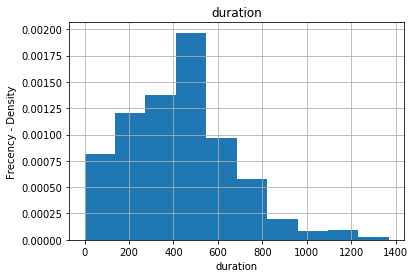

Ultimate minutes mean: 428.0718232044199
Ultimate minutes variance: 58463.016940874826
Ultimate minutes standard deviation: 241.7912672965565
Most of the data will be between -297.3019786852496 and 1153.4456250940893



In [31]:
# Analyse minutes
ultimate_minutes_mean = ultimate_users['duration'].mean()
ultimate_minutes_variance = np.var(ultimate_users['duration'])
ultimate_minutes_sd = np.sqrt(ultimate_minutes_variance)
ultimate_users.hist('duration', density=True)
plt.xlabel('duration')
plt.ylabel('Frecency - Density')
plt.show()
print('Ultimate minutes mean:', ultimate_minutes_mean)
print('Ultimate minutes variance:', ultimate_minutes_variance)
print('Ultimate minutes standard deviation:', ultimate_minutes_sd)
print('Most of the data will be between', ultimate_minutes_mean - 3 * ultimate_minutes_sd, 'and', ultimate_minutes_mean + 3 * ultimate_minutes_sd )
print()


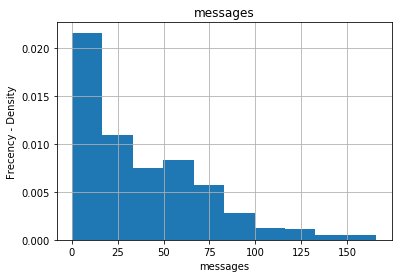

Ultimate messages mean: 37.3439226519337
Ultimate messages variance: 1208.15657908794
Ultimate messages standard deviation: 34.758546849486386
Most of the data will be between -66.93171789652547 and 141.61956320039286



In [32]:
# Analyse messages
ultimate_messages_mean = ultimate_users['messages'].mean()
ultimate_messages_variance = np.var(ultimate_users['messages'])
ultimate_messages_sd = np.sqrt(ultimate_messages_variance)
ultimate_users.hist('messages', density=True)
plt.xlabel('messages')
plt.ylabel('Frecency - Density')
plt.show()
print('Ultimate messages mean:', ultimate_messages_mean)
print('Ultimate messages variance:', ultimate_messages_variance)
print('Ultimate messages standard deviation:', ultimate_messages_sd)
print('Most of the data will be between', ultimate_messages_mean - 3 * ultimate_messages_sd, 'and', ultimate_messages_mean + 3 * ultimate_messages_sd )
print()

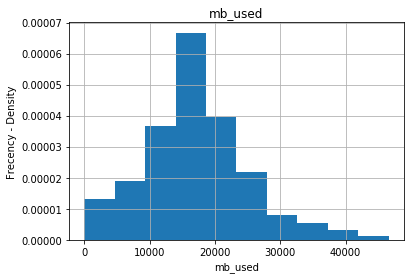

Ultimate data mean: 17119.590856353592
Ultimate data variance: 62854742.21241668
Ultimate data standard deviation: 7928.098272121548
Most of the data will be between -6664.703960011051 and 40903.885672718236



In [33]:
# Analyse of the volume of data
ultimate_data_mean = ultimate_users['mb_used'].mean()
ultimate_data_variance = np.var(ultimate_users['mb_used'])
ultimate_data_sd = np.sqrt(ultimate_data_variance)
ultimate_users.hist('mb_used', density=True)
plt.xlabel('mb_used')
plt.ylabel('Frecency - Density')
plt.show()
print('Ultimate data mean:', ultimate_data_mean)
print('Ultimate data variance:', ultimate_data_variance)
print('Ultimate data standard deviation:', ultimate_data_sd)
print('Most of the data will be between', ultimate_data_mean - 3 * ultimate_data_sd, 'and', ultimate_data_mean + 3 * ultimate_data_sd )
print()

In [34]:
#Analyse of Surf plan
surf_users = user_usages.query('plan == "surf"')

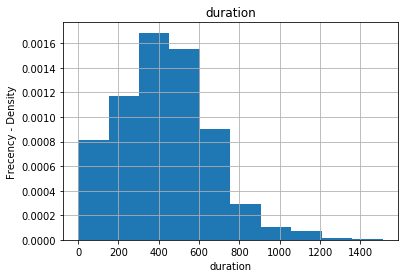

surf minutes mean: 427.12032932235593
surf minutes variance: 55420.45670514804
surf minutes standard deviation: 235.4154980139329
Most of the data will be between -279.12616471944284 and 1133.3668233641547



In [35]:
# Analyse minutes
surf_minutes_mean = surf_users['duration'].mean()
surf_minutes_variance = np.var(surf_users['duration'])
surf_minutes_sd = np.sqrt(surf_minutes_variance)
surf_users.hist('duration', density=True)
plt.xlabel('duration')
plt.ylabel('Frecency - Density')
plt.show()
print('surf minutes mean:', surf_minutes_mean)
print('surf minutes variance:', surf_minutes_variance)
print('surf minutes standard deviation:', surf_minutes_sd)
print('Most of the data will be between', surf_minutes_mean - 3 * surf_minutes_sd, 'and', surf_minutes_mean + 3 * surf_minutes_sd )
print()


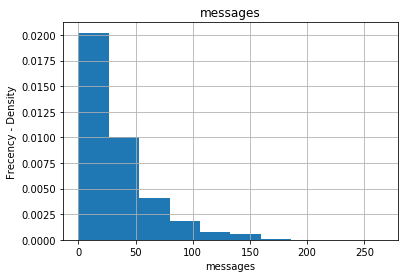

surf messages mean: 31.041165294490185
surf messages variance: 1125.404891865648
surf messages standard deviation: 33.547054891087654
Most of the data will be between -69.59999937877278 and 131.68232996775316



In [36]:
# Analyse messages
surf_messages_mean = surf_users['messages'].mean()
surf_messages_variance = np.var(surf_users['messages'])
surf_messages_sd = np.sqrt(surf_messages_variance)
surf_users.hist('messages', density=True)
plt.xlabel('messages')
plt.ylabel('Frecency - Density')
plt.show()
print('surf messages mean:', surf_messages_mean)
print('surf messages variance:', surf_messages_variance)
print('surf messages standard deviation:', surf_messages_sd)
print('Most of the data will be between', surf_messages_mean - 3 * surf_messages_sd, 'and', surf_messages_mean + 3 * surf_messages_sd )
print()

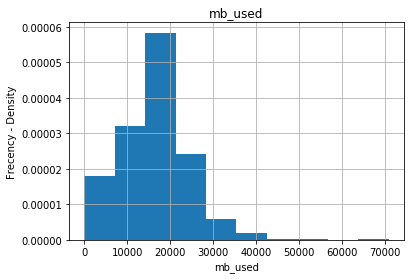

surf data mean: 16495.364110196326
surf data variance: 64969590.72111388
surf data standard deviation: 8060.3716242561595
Most of the data will be between -7685.750762572152 and 40676.47898296481



In [37]:
# Analyse of the volume of data
surf_data_mean = surf_users['mb_used'].mean()
surf_data_variance = np.var(surf_users['mb_used'])
surf_data_sd = np.sqrt(surf_data_variance)
surf_users.hist('mb_used', density=True)
plt.xlabel('mb_used')
plt.ylabel('Frecency - Density')
plt.show()
print('surf data mean:', surf_data_mean)
print('surf data variance:', surf_data_variance)
print('surf data standard deviation:', surf_data_sd)
print('Most of the data will be between', surf_data_mean - 3 * surf_data_sd, 'and', surf_data_mean + 3 * surf_data_sd )
print()

In this part I investigate the clients behavior by dividing them by the plan they using.(Ultimate or Surf).
Here my conclusions for this part:
Minute mean: Ultimate-428, Surf-427

Message mean: Ultimate-37, Surf-31

Data mean: Ultimate-17119, Surf-16495

Minute variance: Ultimate-58463, Surf-55420

Message variance: Ultimate-1208, Surf-1125

Data variance: Ultimate-62854741, Surf-64969590

Minute Standard Deviation: Ultimate-241, Surf-235

Message Standard Deviation: Ultimate-34, Surf-33

Data Standard Deviation: Ultimate-7928, Surf-8060



# 4. Test the hypotheses

In this part we will try to find the average revenue from users of Ultimate and Surf calling plans. We will see the statistics and investigate it.

H0= if surf users total cost and ultimate users total cost are similar, in 99%.  
H1= if surf users total cost and ultimate users total cost are not similar.

In [38]:
#now we checking if the Pvalue is bigger than the alpha to see if the equal_var will be True or False
stats.levene(surf_users['total_cost'], ultimate_users['total_cost'], center = 'mean')

LeveneResult(statistic=611.2268665153016, pvalue=7.132000635052237e-120)

In [39]:
# If the p_value is less than alpha we reject the hypotheses.
#Null hypotheses is when what we compare is equal.

alpha= 0.05
result1 = stats.ttest_ind(
        surf_users['total_cost'], 
        ultimate_users['total_cost'], equal_var = False)

print('p_value:', result1.pvalue)

if(result1.pvalue < alpha):
    print('we reject the null hypotheses')
else:
    print("we can't reject the null hypotheses")
    
surf_mean = surf_users['total_cost'].mean()
ultimate_mean = ultimate_users['total_cost'].mean()
print('Surf mean:', surf_mean)
print('Ultimate mean:', ultimate_mean)
    
          

p_value: 4.022008732278441e-05
we reject the null hypotheses
Surf mean: 66.37820139328689
Ultimate mean: 72.95856353591161


Now we want to check the behavior of user from different regions.
H0= if NY-NJ users total cost and other region users total cost are similar, in 99%.  
H1= if NY-NJ users total cost and other region users total cost are not similar.

In [40]:
#Users from NY-NJ
ny_nj_users = user_usages[user_usages['city'].str.contains("NY-NJ")]
display(ny_nj_users.head(5))
#Users from others regions
other_regions = user_usages[~user_usages['city'].str.contains("NY-NJ")]
display(other_regions.head(5))

,user_id,duration,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
56,1014,163,9.0,1175.59,2.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,0,20.00
57,1014,1114,64.0,7792.41,8.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,0,38.84
75,1022,302,0.0,4908.08,6.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,20.00
76,1022,490,0.0,23436.48,24.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,110.00
77,1022,475,0.0,9933.15,11.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,20.00


,user_id,duration,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,124,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,70.00
1,1001,182,30.0,6919.15,8.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
2,1001,315,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
3,1001,393,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,100.09
4,1001,426,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00


In [41]:
stats.levene(ny_nj_users['total_cost'], other_regions['total_cost'], center = 'mean')

LeveneResult(statistic=3.2098015525057457, pvalue=0.07332972581999571)

In [42]:
alpha= 0.05
result2 = stats.ttest_ind(
        ny_nj_users['total_cost'], 
        other_regions['total_cost'], equal_var = True)

print('p_value:', result2.pvalue)

if(result2.pvalue < alpha):
    print('we reject the null hypotheses')
else:
    print("we can't reject the null hypotheses")
    
ny_nj_users_mean = ny_nj_users['total_cost'].mean()
other_regions_mean = other_regions['total_cost'].mean()
print('NY-NJ users mean:', ny_nj_users_mean)
print('Other regions users mean:', other_regions_mean)
    
          

p_value: 0.1682454331317541
we can't reject the null hypotheses
NY-NJ users mean: 65.17552910052909
Other regions users mean: 69.08926233766235


In this part I test the hypotheses.
The revenue for Ultimate plans and Surf plans are not the same.

The total cost Surf mean is: 50.85 and total cost mean for ultimate plan is: 72.63.

I checked also hypotheses for the region of NY-NJ and the other regions. We also reject the null hypotheses.

The total cost mean for users from NY_NJ is 53 and for users from other regions is 58.6.

# 5. Conclusion

In this project I was asked to analyse the behavior of the customers of Megaline(Telecom companie) in order to find out wich plan is giving more revenue to the companie.

First I start by opening the data. We have five Dataframe: calls, Internet, Messages, plans and users.

Then I prepare the Data for analyse. I add a column for month in call, message and internet Dataframe. Then I count the usage per user per month for each of this categories. I convert mb to gb in order to have a more clear Data.
I join all the Dataframe in one clear Dataframe.

I continue to investigate the clients behavior by dividing them by the plan they using.(Ultimate or Surf).
Here my conclusions for this part:
Minute mean: Ultimate-428, Surf-427
Message mean: Ultimate-37, Surf-31
Data mean: Ultimate-17119, Surf-16495
Minute variance: Ultimate-58463, Surf-55420
Message variance: Ultimate-1208, Surf-1125
Data variance: Ultimate-62854741, Surf-64969590
Minute Standard Deviation: Ultimate-241, Surf-235
Message Standard Deviation: Ultimate-34, Surf-33
Data Standard Deviation: Ultimate-7928, Surf-8060

Finally, I test the hypotheses.
The revenue for Ultimate plans and Surf plans are not the same.
The total cost Surf mean is: 50.85 and total cost mean for ultimate plan is: 72.63.
I checked also hypotheses for the region of NY-NJ and the other regions. We also reject the null hypotheses.
The total cost mean for users from NY_NJ is 53 and for users from other regions is 58.6.

